## Reliance Industries
### Stock Analysis and Forecasting
### Business Objective
Predict the Reliance Industries Stock Price for the next 366 days(1 Year).

There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 2000 to 2023 for Reliance Industries stock.

1. Split the last year into a test set- to build a model to predict stock price.
2. Find short term, & long term trends.
3. Understand how it is impacted from external factors or any big external events.
4. Forecast for next 1 Year.

### Collection of Dataset

1. We collected data from 1-Jan-2000 to 4-Aug-2023.
2. But also you can download data from ‘Yahoo! Finance’ website. You can use Below link.
https://finance.yahoo.com/quote/RELIANCE.NS/history?p=RELIANCE.NS

### About the data

1. Date: Date of trade
2. Open: Opening Price of Stock
3. High: Highest price of stock on that day
4. Low: Lowest price of stock on that day
5. Close: Close price adjusted for splits.
6. Adj Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.
7. Volume: Volume of stock on that day




In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import os
os.chdir("/content/drive/MyDrive/P277/")

In [131]:
# Importing dataset
reliance = pd.read_csv(r"/content/drive/MyDrive/P277/RELIANCE.NS.csv")

In [132]:
reliance.head(10)

Date       Open       High        Low      Close  Adj Close  \
0  2000-01-03  36.747459  38.944569  36.747459  38.944569  29.684193   
1  2000-01-04  39.981236  42.062302  38.882679  42.062302  32.060581   
2  2000-01-05  39.710464  44.545658  39.710464  43.710136  33.316582   
3  2000-01-06  44.715855  46.526150  44.715855  45.543640  34.714119   
4  2000-01-07  45.644211  49.187443  45.334759  48.669109  37.096401   
5  2000-01-10  49.110077  49.311222  47.237892  47.733013  36.382904   
6  2000-01-11  47.647915  48.112095  43.919018  44.638493  34.024197   
7  2000-01-12  44.715855  47.191475  43.655979  46.680878  35.580940   
8  2000-01-13  47.346199  48.955353  47.052219  48.251347  36.777977   
9  2000-01-14  47.887741  49.767666  47.887741  48.939880  37.302784   

        Volume  
0   28802010.0  
1   61320457.0  
2  173426953.0  
3  101355113.0  
4  128426756.0  
5   86714866.0  
6   81074352.0  
7   78264129.0  
8  110363002.0  
9   86996234.0

In [133]:
reliance.tail(10)

Date         Open         High          Low        Close  \
5892  2023-07-24  2481.000000  2514.949951  2469.300049  2487.399902   
5893  2023-07-25  2494.000000  2505.199951  2480.000000  2485.800049   
5894  2023-07-26  2485.000000  2547.000000  2485.000000  2526.199951   
5895  2023-07-27  2534.050049  2537.649902  2490.350098  2502.699951   
5896  2023-07-28  2512.050049  2542.850098  2500.550049  2527.850098   
5897  2023-07-31  2527.850098  2553.899902  2517.949951  2549.250000   
5898  2023-08-01  2555.000000  2559.000000  2505.300049  2513.199951   
5899  2023-08-02  2509.199951  2512.000000  2463.600098  2486.350098   
5900  2023-08-03  2475.300049  2500.899902  2458.050049  2475.899902   
5901  2023-08-04  2498.800049  2516.000000  2471.600098  2509.550049   

        Adj Close      Volume  
5892  2487.399902  11863933.0  
5893  2485.800049   6013010.0  
5894  2526.199951   6455506.0  
5895  2502.699951   8613449.0  
5896  2527.850098  10413926.0  
5897  2549.250000   4275587.0  
5898  2513.199951   4768316.0  
5899  2486.350098   6374107.0  
5900  2475.899902   5084175.0  
5901  2509.550049  11442805.0

## EDA
1. Analysis is only based on Open, High, Low, close price and volume
2. There is no need of Adj Close

In [134]:
# Removing "Adj Close" columnfrom dataset
reliance_1=reliance.drop(["Adj Close"],axis=1).reset_index(drop=True)
reliance_1

Date         Open         High          Low        Close  \
0     2000-01-03    36.747459    38.944569    36.747459    38.944569   
1     2000-01-04    39.981236    42.062302    38.882679    42.062302   
2     2000-01-05    39.710464    44.545658    39.710464    43.710136   
3     2000-01-06    44.715855    46.526150    44.715855    45.543640   
4     2000-01-07    45.644211    49.187443    45.334759    48.669109   
...          ...          ...          ...          ...          ...   
5897  2023-07-31  2527.850098  2553.899902  2517.949951  2549.250000   
5898  2023-08-01  2555.000000  2559.000000  2505.300049  2513.199951   
5899  2023-08-02  2509.199951  2512.000000  2463.600098  2486.350098   
5900  2023-08-03  2475.300049  2500.899902  2458.050049  2475.899902   
5901  2023-08-04  2498.800049  2516.000000  2471.600098  2509.550049   

           Volume  
0      28802010.0  
1      61320457.0  
2     173426953.0  
3     101355113.0  
4     128426756.0  
...           ...  
5897    4275587.0  
5898    4768316.0  
5899    6374107.0  
5900    5084175.0  
5901   11442805.0  

[5902 rows x 6 columns]

In [135]:
# Finding duplicate columns, if any
reliance_1[reliance_1.duplicated()]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [136]:
# Finding null values, if any
reliance_1.isnull().sum()

Date       0
Open      10
High      10
Low       10
Close     10
Volume    10
dtype: int64

In [137]:
#To check which rows have any missing value under any column
reliance_1[reliance_1.isnull().any(axis=1)]

Date  Open  High  Low  Close  Volume
855   2003-04-14   NaN   NaN  NaN    NaN     NaN
1125  2004-04-26   NaN   NaN  NaN    NaN     NaN
1247  2004-10-13   NaN   NaN  NaN    NaN     NaN
2563  2010-02-06   NaN   NaN  NaN    NaN     NaN
3041  2012-01-07   NaN   NaN  NaN    NaN     NaN
3080  2012-03-03   NaN   NaN  NaN    NaN     NaN
3210  2012-09-08   NaN   NaN  NaN    NaN     NaN
3252  2012-11-11   NaN   NaN  NaN    NaN     NaN
3589  2014-03-22   NaN   NaN  NaN    NaN     NaN
3818  2015-02-28   NaN   NaN  NaN    NaN     NaN

In [138]:
# Removing the row which have null value
reliance_2=reliance_1.dropna().reset_index(drop=True)
reliance_2


Date         Open         High          Low        Close  \
0     2000-01-03    36.747459    38.944569    36.747459    38.944569   
1     2000-01-04    39.981236    42.062302    38.882679    42.062302   
2     2000-01-05    39.710464    44.545658    39.710464    43.710136   
3     2000-01-06    44.715855    46.526150    44.715855    45.543640   
4     2000-01-07    45.644211    49.187443    45.334759    48.669109   
...          ...          ...          ...          ...          ...   
5887  2023-07-31  2527.850098  2553.899902  2517.949951  2549.250000   
5888  2023-08-01  2555.000000  2559.000000  2505.300049  2513.199951   
5889  2023-08-02  2509.199951  2512.000000  2463.600098  2486.350098   
5890  2023-08-03  2475.300049  2500.899902  2458.050049  2475.899902   
5891  2023-08-04  2498.800049  2516.000000  2471.600098  2509.550049   

           Volume  
0      28802010.0  
1      61320457.0  
2     173426953.0  
3     101355113.0  
4     128426756.0  
...           ...  
5887    4275587.0  
5888    4768316.0  
5889    6374107.0  
5890    5084175.0  
5891   11442805.0  

[5892 rows x 6 columns]

In [139]:
# Checking wether if there exist any null values
reliance_2[reliance_2.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []

In [140]:
# Making a copy of dataset as reliance
reliance=reliance_2.copy()
reliance

Date         Open         High          Low        Close  \
0     2000-01-03    36.747459    38.944569    36.747459    38.944569   
1     2000-01-04    39.981236    42.062302    38.882679    42.062302   
2     2000-01-05    39.710464    44.545658    39.710464    43.710136   
3     2000-01-06    44.715855    46.526150    44.715855    45.543640   
4     2000-01-07    45.644211    49.187443    45.334759    48.669109   
...          ...          ...          ...          ...          ...   
5887  2023-07-31  2527.850098  2553.899902  2517.949951  2549.250000   
5888  2023-08-01  2555.000000  2559.000000  2505.300049  2513.199951   
5889  2023-08-02  2509.199951  2512.000000  2463.600098  2486.350098   
5890  2023-08-03  2475.300049  2500.899902  2458.050049  2475.899902   
5891  2023-08-04  2498.800049  2516.000000  2471.600098  2509.550049   

           Volume  
0      28802010.0  
1      61320457.0  
2     173426953.0  
3     101355113.0  
4     128426756.0  
...           ...  
5887    4275587.0  
5888    4768316.0  
5889    6374107.0  
5890    5084175.0  
5891   11442805.0  

[5892 rows x 6 columns]

## Descriptive Statistics

In [141]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5892 non-null   object 
 1   Open    5892 non-null   float64
 2   High    5892 non-null   float64
 3   Low     5892 non-null   float64
 4   Close   5892 non-null   float64
 5   Volume  5892 non-null   float64
dtypes: float64(5), object(1)
memory usage: 276.3+ KB


In [142]:
reliance.describe()

Open         High          Low        Close        Volume
count  5892.000000  5892.000000  5892.000000  5892.000000  5.892000e+03
mean    683.680438   691.740443   674.966993   683.038009  1.655949e+07
std     728.566621   735.943248   720.602916   727.984433  1.795133e+07
min      31.796223    33.962387    30.504259    31.440351  0.000000e+00
25%     114.400643   116.851116   113.269205   114.555373  6.216666e+06
50%     455.197677   463.741684   449.353089   454.863358  9.994796e+06
75%     792.673721   802.524124   785.281296   792.308441  1.993934e+07
max    2856.149902  2856.149902  2797.000000  2841.850098  2.918015e+08



* Every attributes are highly corelated except volume



In [143]:
# converting the date column in to datetime
reliance['Date']=pd.to_datetime(reliance['Date'],format='%Y-%m-%d')
reliance

Date         Open         High          Low        Close  \
0    2000-01-03    36.747459    38.944569    36.747459    38.944569   
1    2000-01-04    39.981236    42.062302    38.882679    42.062302   
2    2000-01-05    39.710464    44.545658    39.710464    43.710136   
3    2000-01-06    44.715855    46.526150    44.715855    45.543640   
4    2000-01-07    45.644211    49.187443    45.334759    48.669109   
...         ...          ...          ...          ...          ...   
5887 2023-07-31  2527.850098  2553.899902  2517.949951  2549.250000   
5888 2023-08-01  2555.000000  2559.000000  2505.300049  2513.199951   
5889 2023-08-02  2509.199951  2512.000000  2463.600098  2486.350098   
5890 2023-08-03  2475.300049  2500.899902  2458.050049  2475.899902   
5891 2023-08-04  2498.800049  2516.000000  2471.600098  2509.550049   

           Volume  
0      28802010.0  
1      61320457.0  
2     173426953.0  
3     101355113.0  
4     128426756.0  
...           ...  
5887    4275587.0  
5888    4768316.0  
5889    6374107.0  
5890    5084175.0  
5891   11442805.0  

[5892 rows x 6 columns]

In [144]:
# Setting the date column as index
reliance=reliance.set_index('Date')
reliance

Open         High          Low        Close       Volume
Date                                                                       
2000-01-03    36.747459    38.944569    36.747459    38.944569   28802010.0
2000-01-04    39.981236    42.062302    38.882679    42.062302   61320457.0
2000-01-05    39.710464    44.545658    39.710464    43.710136  173426953.0
2000-01-06    44.715855    46.526150    44.715855    45.543640  101355113.0
2000-01-07    45.644211    49.187443    45.334759    48.669109  128426756.0
...                 ...          ...          ...          ...          ...
2023-07-31  2527.850098  2553.899902  2517.949951  2549.250000    4275587.0
2023-08-01  2555.000000  2559.000000  2505.300049  2513.199951    4768316.0
2023-08-02  2509.199951  2512.000000  2463.600098  2486.350098    6374107.0
2023-08-03  2475.300049  2500.899902  2458.050049  2475.899902    5084175.0
2023-08-04  2498.800049  2516.000000  2471.600098  2509.550049   11442805.0

[5892 rows x 5 columns]

## Visualizations

Text(0.5, 1.0, 'Low')

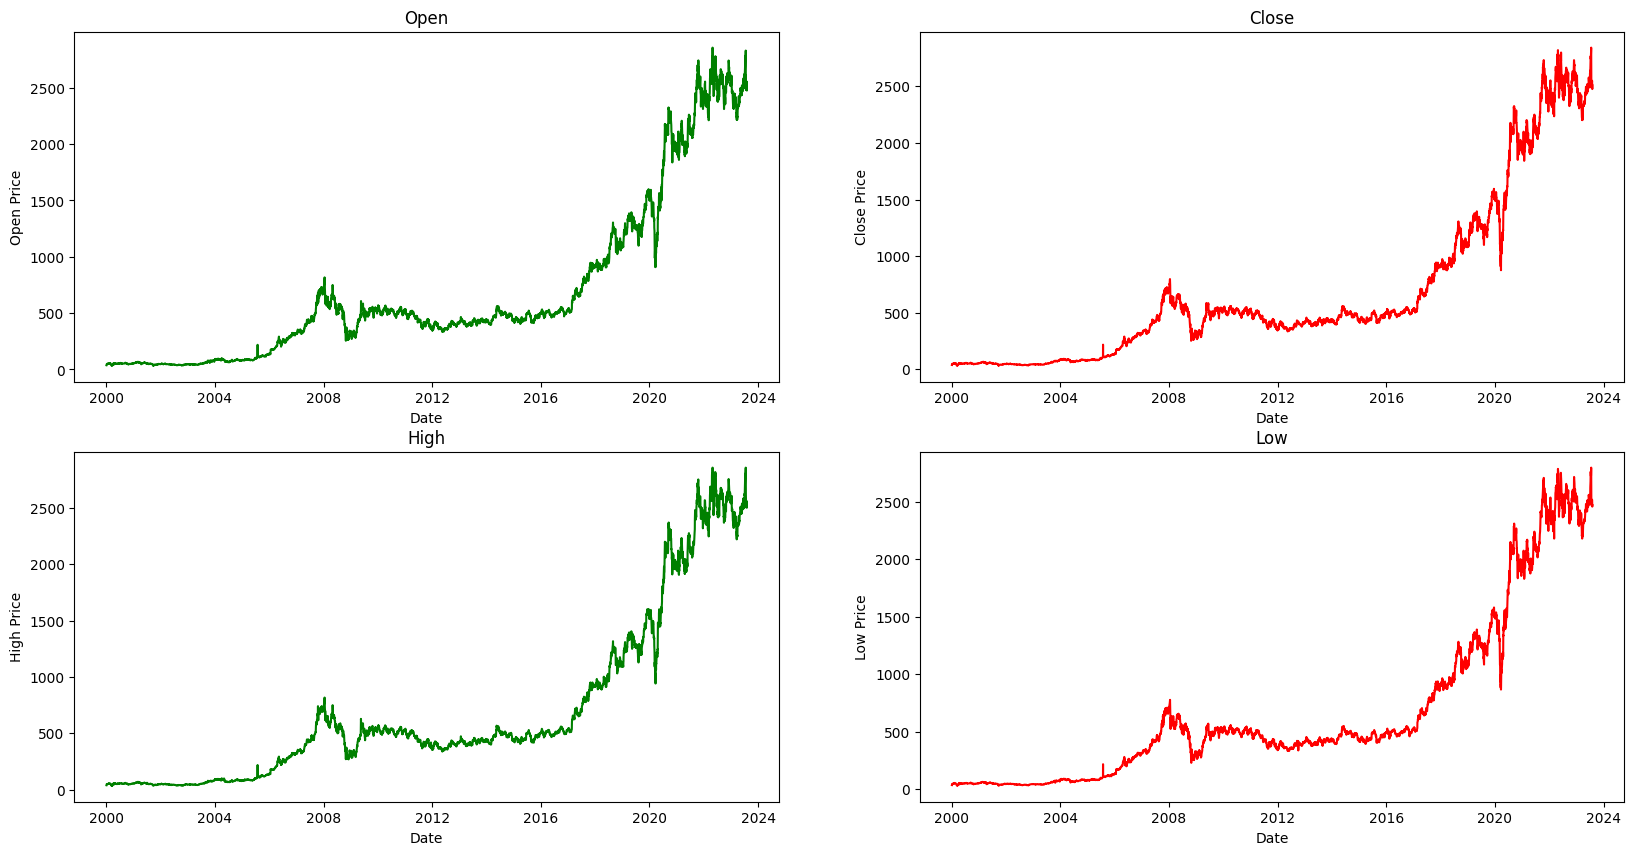

In [145]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(reliance['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')

#Plot 2
plt.subplot(2,2,2)
plt.plot(reliance['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')

#Plot 3
plt.subplot(2,2,3)
plt.plot(reliance['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')

#Plot 4
plt.subplot(2,2,4)
plt.plot(reliance['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

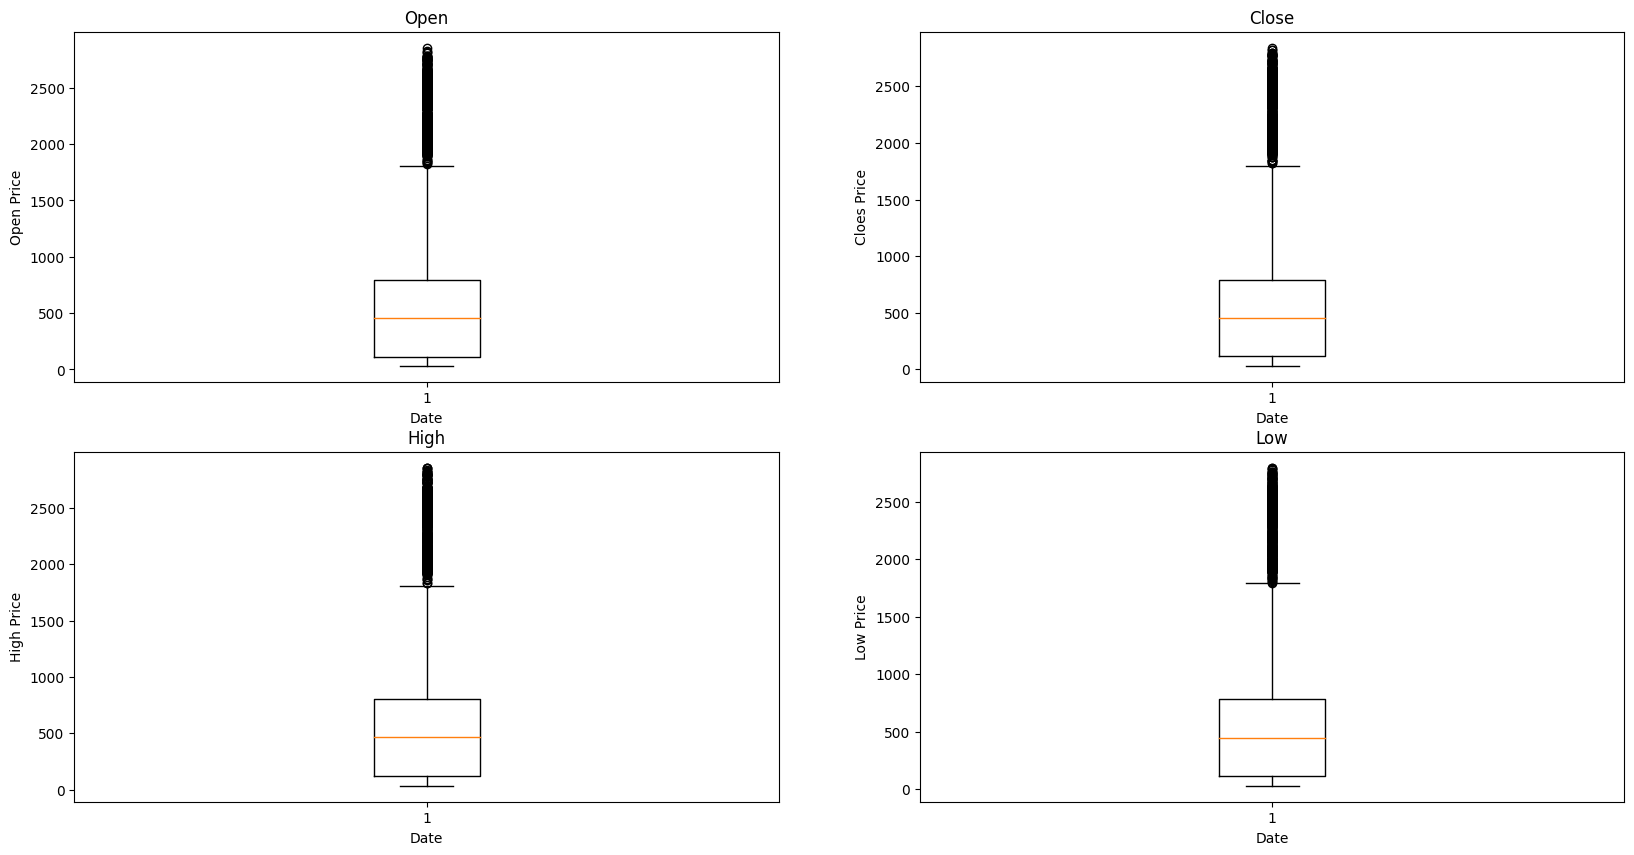

In [146]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(reliance['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')

#Plot 2
plt.subplot(2,2,2)
plt.boxplot(reliance['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')

#Plot 3
plt.subplot(2,2,3)
plt.boxplot(reliance['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')

#Plot 4
plt.subplot(2,2,4)
plt.boxplot(reliance['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')



*   From the box plot it is clear that there are no outliers in the dataset



Text(0.5, 1.0, 'Low')

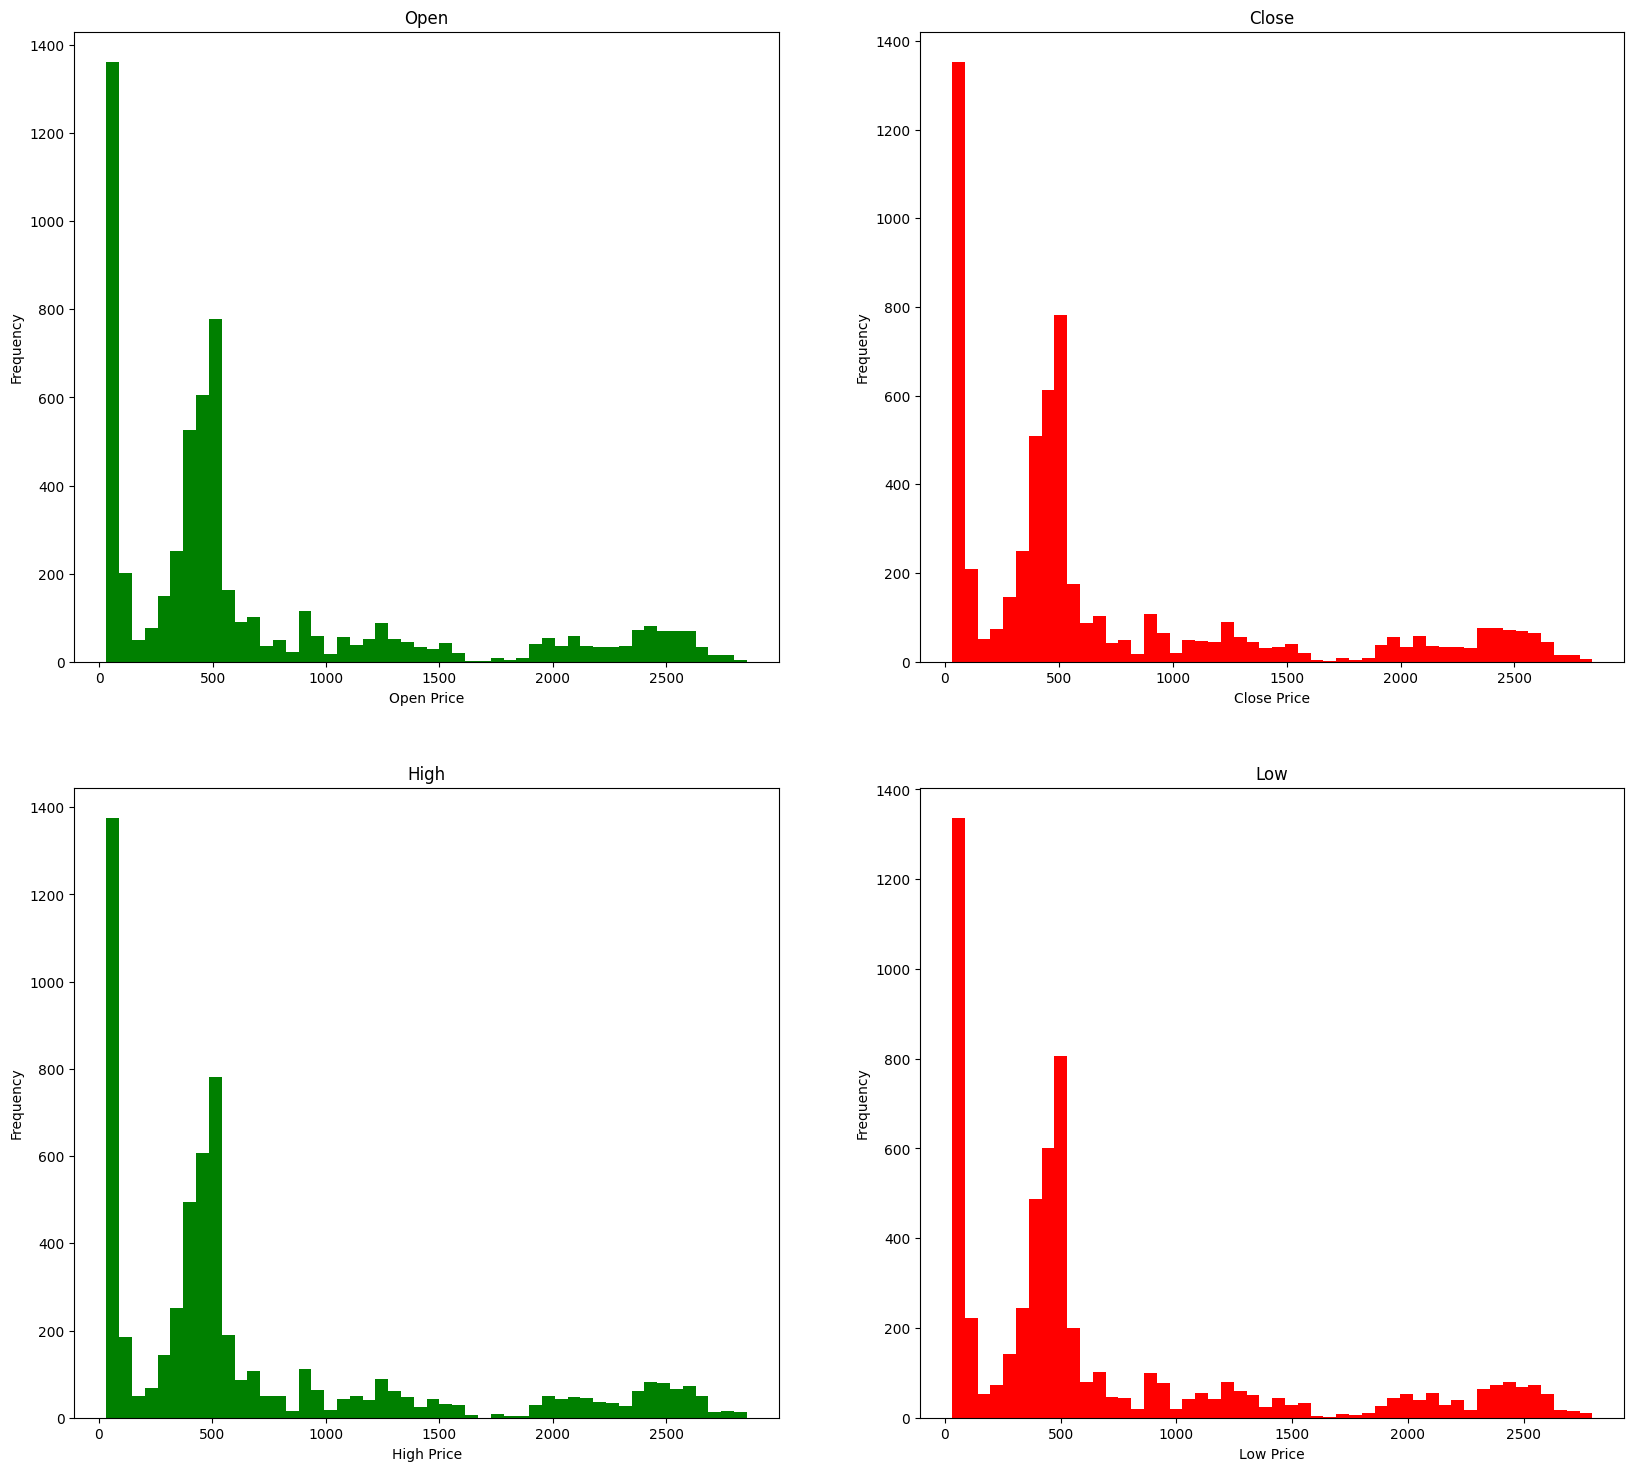

In [147]:
# Ploting Histogram
plt.figure(figsize=(20,18))
#Plot 1
plt.subplot(2,2,1)
plt.hist(reliance['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')

#Plot 2
plt.subplot(2,2,2)
plt.hist(reliance['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')

#Plot 3
plt.subplot(2,2,3)
plt.hist(reliance['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')

#Plot 4
plt.subplot(2,2,4)
plt.hist(reliance['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Low')

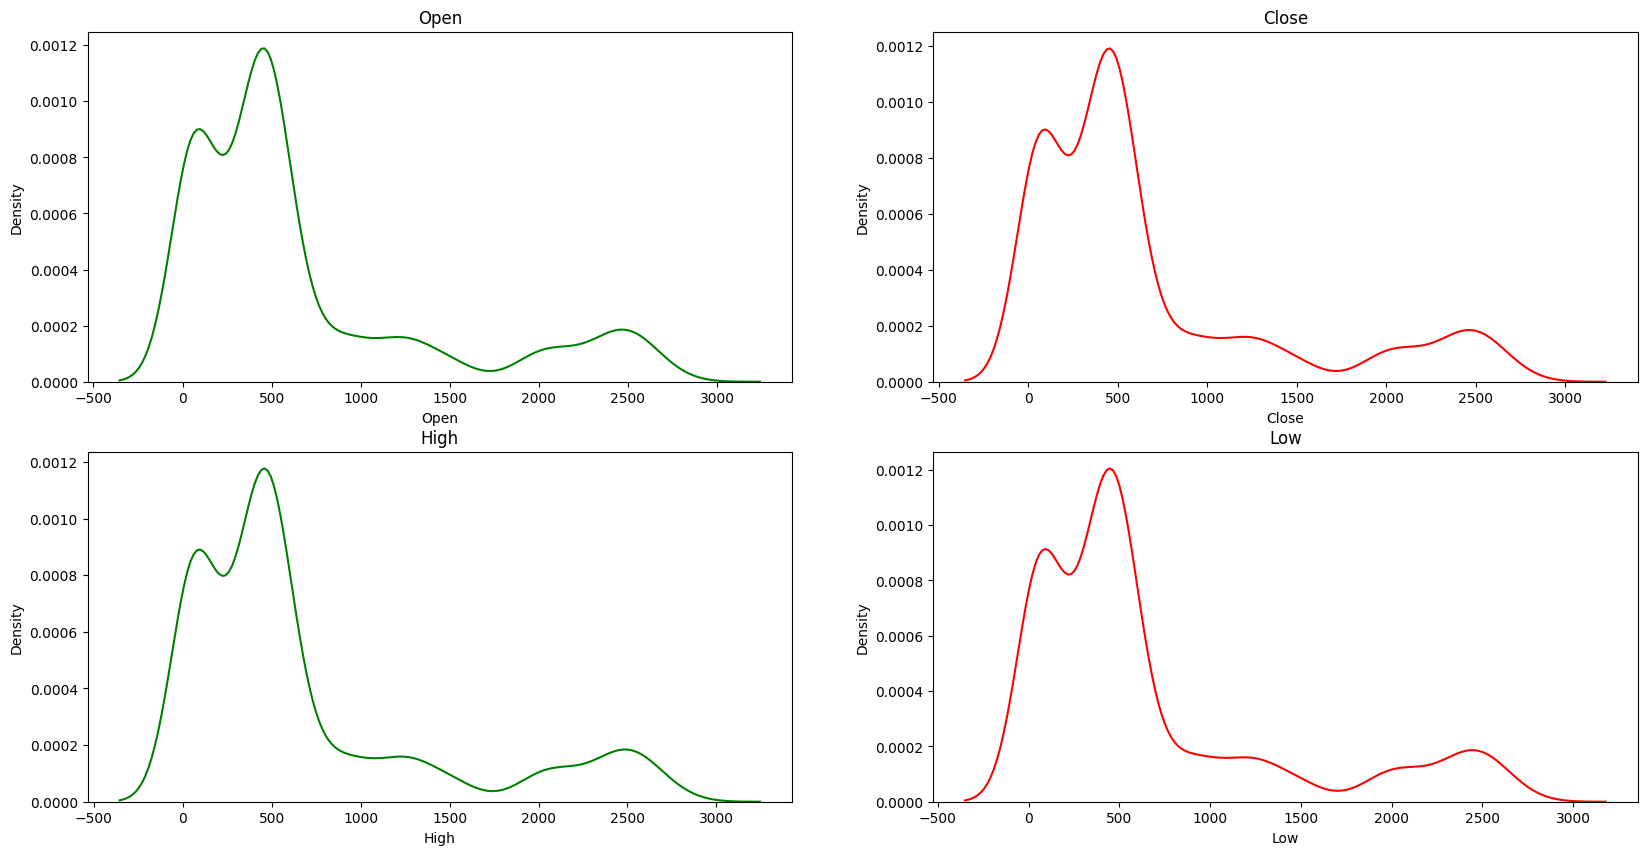

In [148]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(reliance['Open'], color='green')
plt.title('Open')

#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(reliance['Close'], color='red')
plt.title('Close')

#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(reliance['High'], color='green')
plt.title('High')

#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(reliance['Low'], color='red')
plt.title('Low')

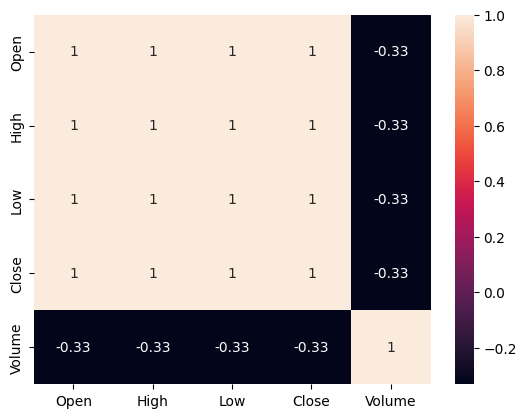

In [149]:
sns.heatmap(reliance.corr(),annot=True)
plt.show()

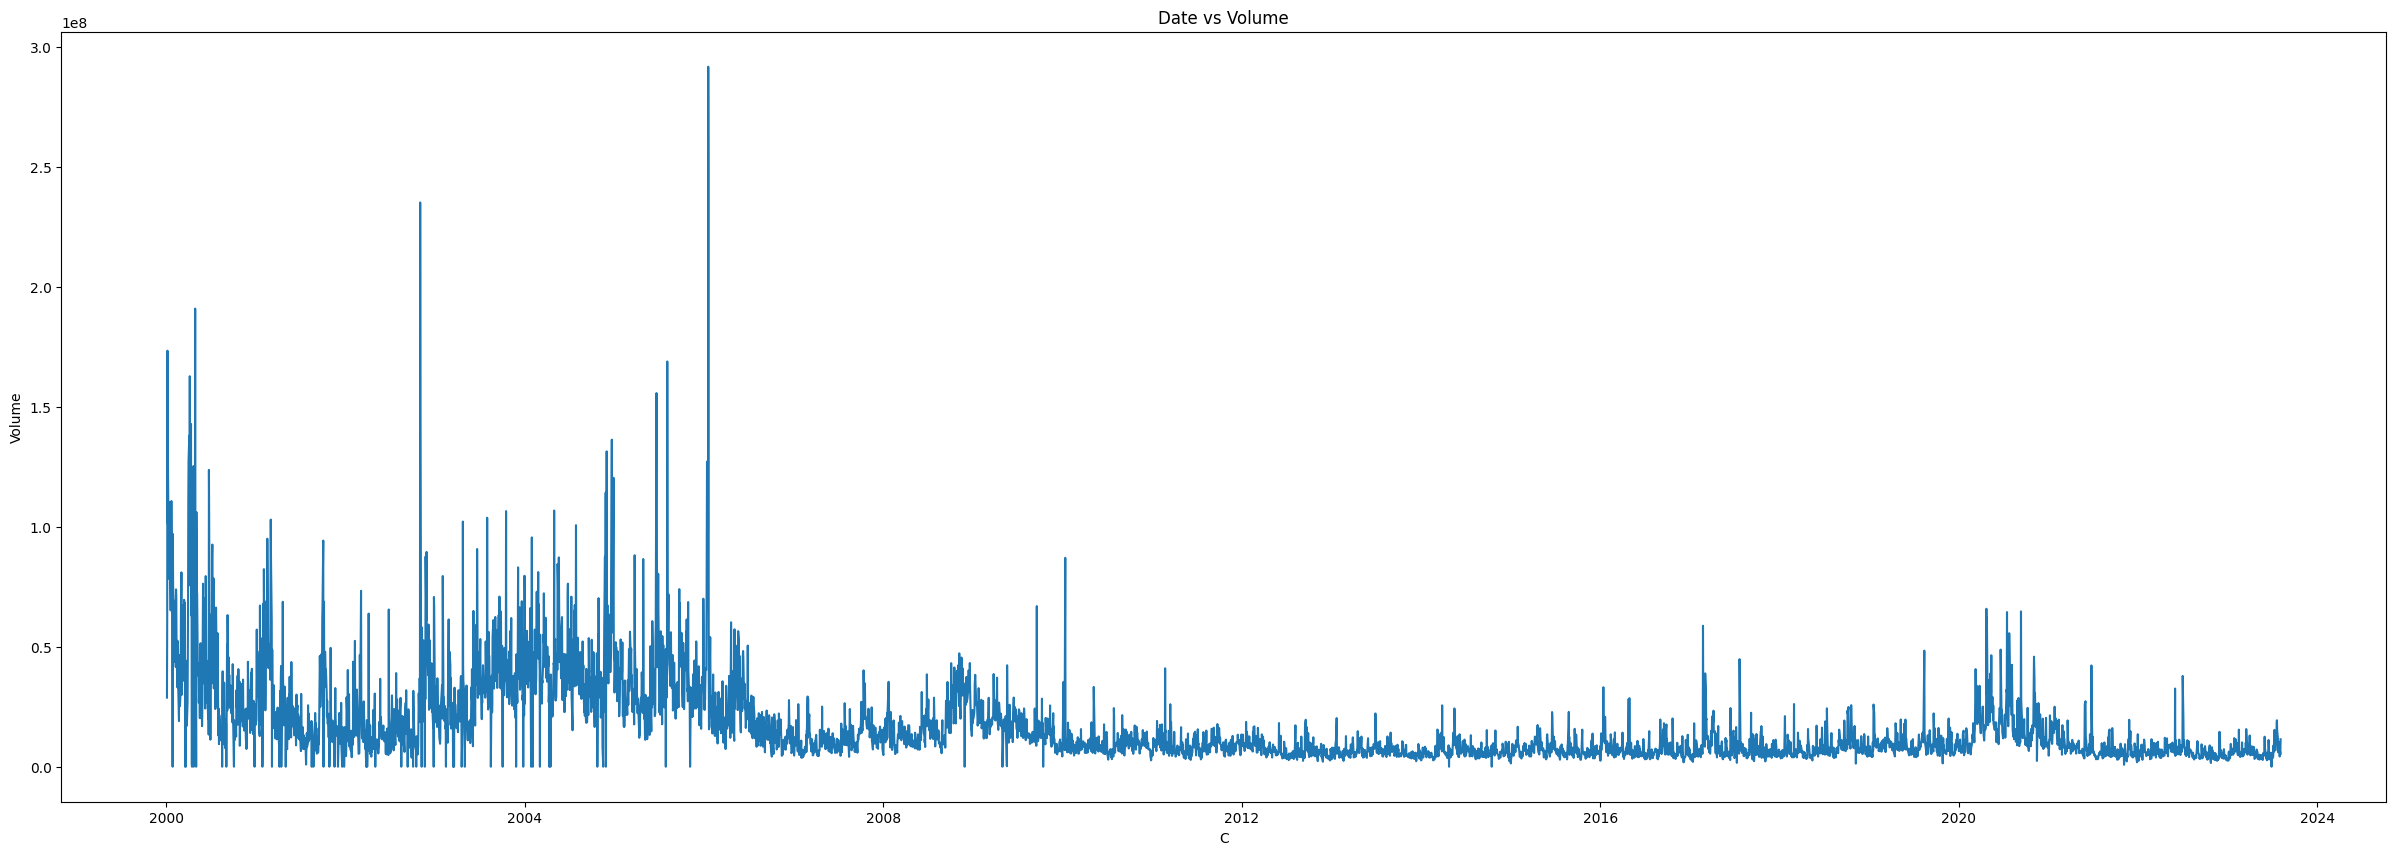

In [150]:
figure=plt.figure(figsize=(30,10))
plt.plot(reliance['Volume'])
plt.xlabel('C')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

###Finding long-term and short-term trends
#### Moving Average

In [151]:
reliance_ma=reliance.copy()
reliance_ma['30-day MA']=reliance['Close'].rolling(window=30).mean()
reliance_ma['300-day MA']=reliance['Close'].rolling(window=300).mean()

In [152]:
reliance_ma

Open         High          Low        Close       Volume  \
Date                                                                          
2000-01-03    36.747459    38.944569    36.747459    38.944569   28802010.0   
2000-01-04    39.981236    42.062302    38.882679    42.062302   61320457.0   
2000-01-05    39.710464    44.545658    39.710464    43.710136  173426953.0   
2000-01-06    44.715855    46.526150    44.715855    45.543640  101355113.0   
2000-01-07    45.644211    49.187443    45.334759    48.669109  128426756.0   
...                 ...          ...          ...          ...          ...   
2023-07-31  2527.850098  2553.899902  2517.949951  2549.250000    4275587.0   
2023-08-01  2555.000000  2559.000000  2505.300049  2513.199951    4768316.0   
2023-08-02  2509.199951  2512.000000  2463.600098  2486.350098    6374107.0   
2023-08-03  2475.300049  2500.899902  2458.050049  2475.899902    5084175.0   
2023-08-04  2498.800049  2516.000000  2471.600098  2509.550049   11442805.0   

              30-day MA   300-day MA  
Date                                  
2000-01-03          NaN          NaN  
2000-01-04          NaN          NaN  
2000-01-05          NaN          NaN  
2000-01-06          NaN          NaN  
2000-01-07          NaN          NaN  
...                 ...          ...  
2023-07-31  2609.048340  2500.692843  
2023-08-01  2607.761670  2500.609009  
2023-08-02  2605.403337  2500.630675  
2023-08-03  2602.456665  2500.135509  
2023-08-04  2601.591667  2499.811009  

[5892 rows x 7 columns]

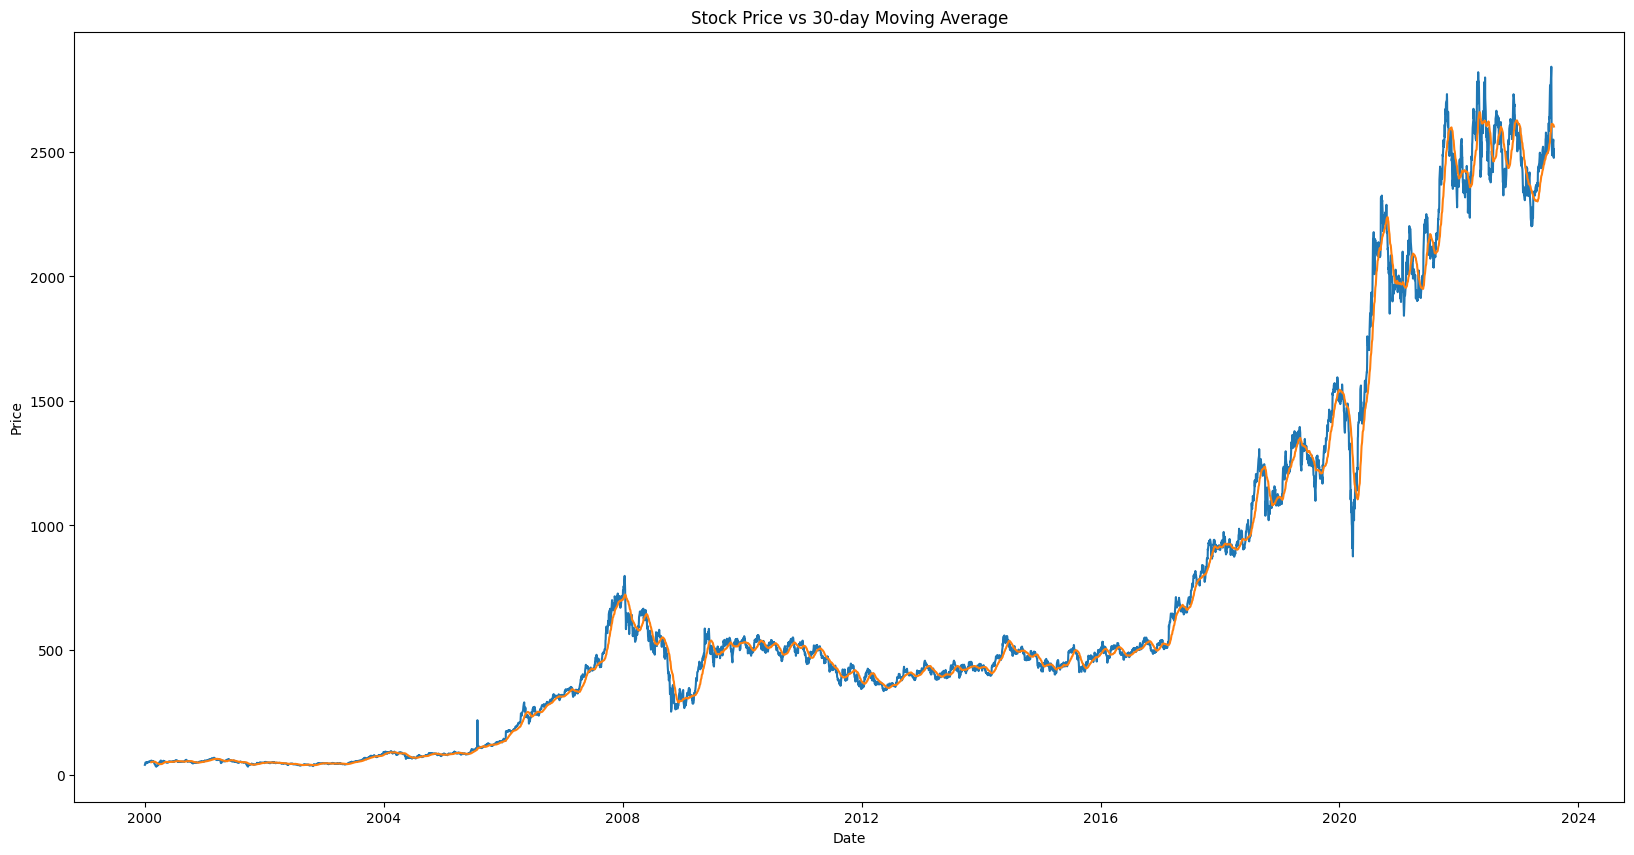

In [153]:
plt.figure(figsize=(20,10))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

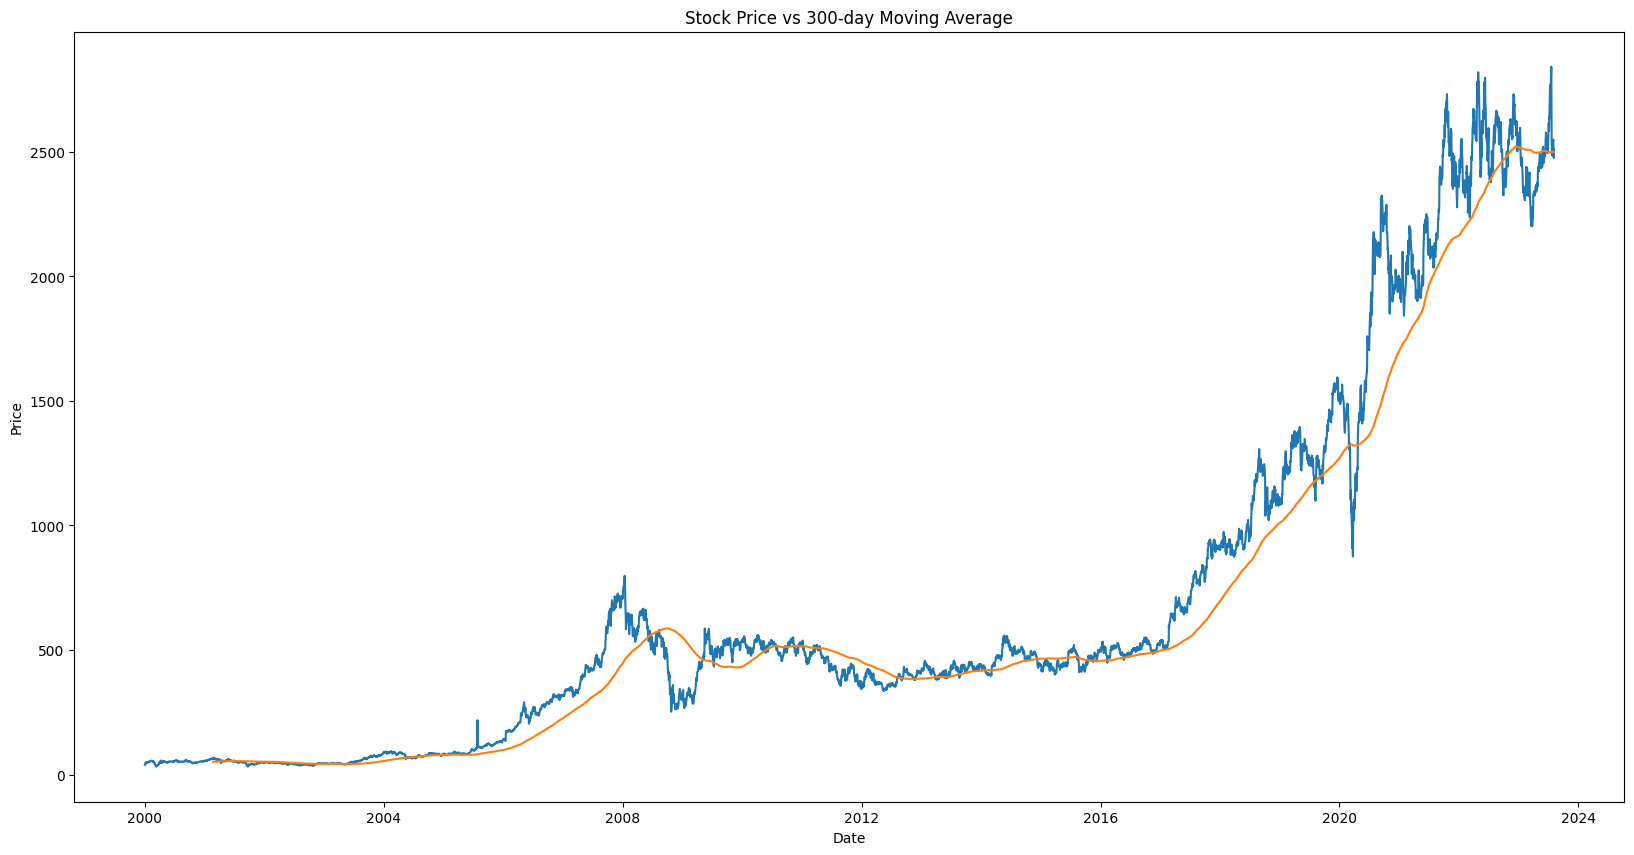

In [154]:
plt.figure(figsize=(20,10))
plt.plot(reliance_ma['Close'],label='Original data')
plt.plot(reliance_ma['300-day MA'],label='300-MA')
plt.legend
plt.title('Stock Price vs 300-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Long term and short term trends can be identified using the Moving Average graphs

1. In long term, Stock price is in upward trend
2. Short term trends can be identified from MA-30 chart
3. Stock had a major short term downtrend during the year 2020
4. It may be due to the bearish market during the Covid-19 outbreak

## Model Building

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [156]:
reliance

Open         High          Low        Close       Volume
Date                                                                       
2000-01-03    36.747459    38.944569    36.747459    38.944569   28802010.0
2000-01-04    39.981236    42.062302    38.882679    42.062302   61320457.0
2000-01-05    39.710464    44.545658    39.710464    43.710136  173426953.0
2000-01-06    44.715855    46.526150    44.715855    45.543640  101355113.0
2000-01-07    45.644211    49.187443    45.334759    48.669109  128426756.0
...                 ...          ...          ...          ...          ...
2023-07-31  2527.850098  2553.899902  2517.949951  2549.250000    4275587.0
2023-08-01  2555.000000  2559.000000  2505.300049  2513.199951    4768316.0
2023-08-02  2509.199951  2512.000000  2463.600098  2486.350098    6374107.0
2023-08-03  2475.300049  2500.899902  2458.050049  2475.899902    5084175.0
2023-08-04  2498.800049  2516.000000  2471.600098  2509.550049   11442805.0

[5892 rows x 5 columns]

In [157]:
# Creating dataframe which only includes date and close price

close_df=pd.DataFrame(reliance["Close"])
close_df

Close
Date                   
2000-01-03    38.944569
2000-01-04    42.062302
2000-01-05    43.710136
2000-01-06    45.543640
2000-01-07    48.669109
...                 ...
2023-07-31  2549.250000
2023-08-01  2513.199951
2023-08-02  2486.350098
2023-08-03  2475.899902
2023-08-04  2509.550049

[5892 rows x 1 columns]

In [158]:
print(close_df.shape)

(5892, 1)


In [159]:
close_df=close_df.reset_index()

In [160]:
close_df['Date']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5887   2023-07-31
5888   2023-08-01
5889   2023-08-02
5890   2023-08-03
5891   2023-08-04
Name: Date, Length: 5892, dtype: datetime64[ns]

### Normalizing / scaling close value between 0 to 1

In [161]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(5892, 1)


### Split data for training and testing

* Ratio for training and testing data is 85:15



In [162]:
training_size=int(len(closedf)*0.85)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (5008, 1)
test_data:  (884, 1)


### Create new dataset according to requirement of time-series prediction

In [163]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [164]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (4994, 13)
y_train:  (4994,)
X_test:  (870, 13)
y_test (870,)


## Algorithms
### Support vector regression - SVR

In [165]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [166]:
# Lets Do the prediction

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4994, 1)
Test data prediction: (870, 1)


In [167]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

##Evaluation metrices RMSE, MSE and MAE
#### Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [168]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  183.31401543849327
Train data MSE:  33604.028256184145
Test data MAE:  167.12669074731647
-------------------------------------------------------------------------------------
Test data RMSE:  510.5332178739831
Test data MSE:  260644.16655276393
Test data MAE:  487.1969693466328


## Explained variance regression score
##### The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [169]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8859776759011223
Test data explained variance regression score: 0.8280752558457878


## R2 score for regression
### R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [170]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.6977154807818099
Test data R2 score: -0.7446083849207046


### Comparision between original stock close price vs predicted close price

In [171]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (5892, 1)
Test predicted data:  (5892, 1)


### Forecasting next 1 year

In [172]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 366
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = svr_rbf.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  366


Plotting last 15 days and next predicted 366 days (1 year)

In [173]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 2

In [174]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 366 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 366 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Plotting whole closing stock price with prediction

In [175]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Random Forest Regressor - RF

In [176]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [177]:
# Lets Do the prediction

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4994, 1)
Test data prediction: (870, 1)


In [178]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

## Evaluation metrices RMSE, MSE and MAE

In [179]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  4.033727538799161
Train data MSE:  16.270957857266737
Test data MAE:  2.373928432949551
-------------------------------------------------------------------------------------
Test data RMSE:  747.0709581009273
Test data MSE:  558115.0164378375
Test data MAE:  674.5627561207002


## Explained variance regression score

In [180]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9998536370071028
Test data explained variance regression score: 0.26936605518449563


## R2 score for regression

In [181]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9998536348489054
Test data R2 score: -2.7357142893527877


## Comparision between original stock close price vs predicted close price

In [182]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (5892, 1)
Test predicted data:  (5892, 1)


## Forecasting next 1 year

In [183]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 366
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = regressor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  366


## Plotting last 15 days and next predicted 366 days

In [184]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 2

In [185]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 366 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 366 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


## Plotting whole closing stock price with prediction

In [186]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## K-nearest neighgbour - KNN

In [187]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [188]:
# Lets Do the prediction

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4994, 1)
Test data prediction: (870, 1)


In [189]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

## Evaluation metrices RMSE, MSE and MAE

In [190]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  12.305187081754214
Train data MSE:  151.4176291169708
Test data MAE:  7.169658008918393
-------------------------------------------------------------------------------------
Test data RMSE:  772.3091880239818
Test data MSE:  596461.4819062621
Test data MAE:  702.572142936251


## Explained variance regression score

In [191]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9986379252484269
Test data explained variance regression score: 0.23053513508411383


## R2 score for regression

In [192]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9986379250466688
Test data R2 score: -2.9923843927857106


## Comparision between original stock close price vs predicted close price

In [193]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (5892, 1)
Test predicted data:  (5892, 1)


## Forecasting for 1 Year

In [194]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 366
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = neighbor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  366


## Plotting last 15 days and next predicted 366 days (1 year)

In [195]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 2

In [196]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 366 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 366 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Plotting whole closing stock price with prediction

In [197]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# LSTM

In [198]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (4994, 13, 1)
X_test:  (870, 13, 1)


## LSTM model structure

In [199]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [200]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21025 (82.13 KB)
Trainable params: 21025 (82.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [201]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
157/157 [==============================] - 7s 16ms/step - loss: 0.0010 - val_loss: 0.0035
Epoch 2/100
157/157 [==============================] - 2s 11ms/step - loss: 8.4787e-05 - val_loss: 0.0021
Epoch 3/100
157/157 [==============================] - 2s 10ms/step - loss: 8.4156e-05 - val_loss: 0.0047
Epoch 4/100
157/157 [==============================] - 1s 8ms/step - loss: 9.2264e-05 - val_loss: 0.0027
Epoch 5/100
157/157 [==============================] - 1s 7ms/step - loss: 8.8799e-05 - val_loss: 0.0015
Epoch 6/100
157/157 [==============================] - 1s 8ms/step - loss: 8.9857e-05 - val_loss: 0.0030
Epoch 7/100
157/157 [==============================] - 1s 7ms/step - loss: 7.6007e-05 - val_loss: 0.0021
Epoch 8/100
157/157 [==============================] - 1s 8ms/step - loss: 7.9924e-05 - val_loss: 0.0013
Epoch 9/100
157/157 [==============================] - 1s 7ms/step - loss: 7.0217e-05 - val_loss: 0.0026
Epoch 10/100
157/157 [==============================] - 

In [202]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

28/28 [==============================] - 0s 4ms/step


((4994, 1), (870, 1))

In [203]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE

In [204]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  11.68337977934423
Train data MSE:  136.50136306838962
Test data MAE:  8.996656626977668
-------------------------------------------------------------------------------------
Test data RMSE:  79.94171453511375
Test data MSE:  6390.677722813616
Test data MAE:  68.16615757117906


In [205]:
### Explained variance regression score

In [206]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9990032215941614
Test data explained variance regression score: 0.9837372206979321


### R2 score for regression

In [207]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9987721040884388
Test data R2 score: 0.957224325838539


### Comparision between original stock close price vs predicted close price


In [208]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (5892, 1)
Test predicted data:  (5892, 1)


### Forecasting for next 1 Year

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 366
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

### Plotting last 15 days and next predicted 366 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 366 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 366 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# GRU (Gated Recurrent Unit)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
157/157 [==============================] - 10s 19ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 2/100
157/157 [==============================] - 1s 8ms/step - loss: 5.9739e-05 - val_loss: 0.0014
Epoch 3/100
157/157 [==============================] - 1s 8ms/step - loss: 6.7077e-05 - val_loss: 0.0012
Epoch 4/100
157/157 [==============================] - 2s 11ms/step - loss: 5.7532e-05 - val_loss: 6.9673e-04
Epoch 5/100
157/157 [==============================] - 1s 9ms/step - loss: 6.1497e-05 - val_loss: 7.8867e-04
Epoch 6/100
157/157 [==============================] - 2s 11ms/step - loss: 5.1705e-05 - val_loss: 7.2125e-04
Epoch 7/100
157/157 [==============================] - 2s 12ms/step - loss: 4.9622e-05 - val_loss: 0.0014
Epoch 8/100
157/157 [==============================] - 1s 9ms/step - loss: 6.5040e-05 - val_loss: 0.0011
Epoch 9/100
157/157 [==============================] - 1s 9ms/step - loss: 4.4005e-05 - val_loss: 6.8837e-04
Epoch 10/100
157/157 [================

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

28/28 [==============================] - 0s 3ms/step


((4994, 1), (870, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  14.063720567912933
Train data MSE:  197.78823621233724
Test data MAE:  10.29790761106496
-------------------------------------------------------------------------------------
Test data RMSE:  160.30195070525627
Test data MSE:  25696.715399910416
Test data MAE:  145.50847920618264


### Explained variance regression score

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.998224443245393
Test data explained variance regression score: 0.9663026284106127


### R2 score for regression

In [ ]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.9982207989639023
Test data R2 score: 0.8280003510359426


### Comparision between original stock close price vs predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (5892, 1)
Test predicted data:  (5892, 1)


In [ ]:
plotdf.head(100)

Date  original_close  train_predicted_close  test_predicted_close
0  2000-01-03       38.944569                    NaN                   NaN
1  2000-01-04       42.062302                    NaN                   NaN
2  2000-01-05       43.710136                    NaN                   NaN
3  2000-01-06       45.543640                    NaN                   NaN
4  2000-01-07       48.669109                    NaN                   NaN
..        ...             ...                    ...                   ...
95 2000-05-15       49.435001              61.252171                   NaN
96 2000-05-16       49.110077              61.738361                   NaN
97 2000-05-17       49.334431              61.496891                   NaN
98 2000-05-18       47.980576              61.598972                   NaN
99 2000-05-19       48.831570              60.457989                   NaN

[100 rows x 4 columns]

### Forecasting for next 1 Year

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 366
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  366


### Plotting last 15 days and next predicted 366 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 2

In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 366 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 366 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [ ]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

svr           rf          knn         lstm         gru
0      38.944569    38.944569    38.944569    38.944569   38.944569
1      42.062302    42.062302    42.062302    42.062302   42.062302
2      43.710136    43.710136    43.710136    43.710136   43.710136
3      45.543640    45.543640    45.543640    45.543640   45.543640
4      48.669109    48.669109    48.669109    48.669109   48.669109
...          ...          ...          ...          ...         ...
6253  861.112651  1572.943092  1554.152804  1206.088724  414.548484
6254  861.112651  1572.943092  1554.152804  1206.067952  414.528675
6255  861.112650  1572.943092  1554.152804  1206.047599  414.509285
6256  861.112650  1572.943092  1554.152804  1206.027246  414.490231
6257  861.112650  1572.943092  1554.152804  1206.007228  414.471595

[6258 rows x 5 columns]

# Conclusion Chart

In [ ]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:],
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

Model  Train R2 Score  Test R2 Score
0            SVR        0.697715      -0.744608
1  Random Forest        0.999854      -2.735714
2            KNN        0.998638      -2.992384
3           LSTM        0.998772       0.957224
4            GRU        0.998221       0.828000

### By Looking into this table we can say that our LSTM model have best R2 score.